In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\berke\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def listing(klasor,a):
    list1 = []
    list2 = []
    for dosya_adi in os.listdir(klasor):
        dosya_yolu = os.path.join(klasor, dosya_adi)
        
        if dosya_adi.endswith(('.png', '.jpg', '.jpeg')):
            
            resim = cv2.imread(dosya_yolu, cv2.IMREAD_GRAYSCALE)#GRAYSCALEDE OKUMAK
            resim = cv2.resize(resim, (128,128))#RESİZELAMAK
            list1.append(resim)
            list2.append(a)
            
            
    return list1,list2

In [3]:
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\0"
listx,listy = listing(klasor_yolu,0)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\1"
lista,listb = listing(klasor_yolu,1)
listx.extend(lista),listy.extend(listb)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\2"
lista,listb = listing(klasor_yolu,2)
listx.extend(lista),listy.extend(listb)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\3"
lista,listb = listing(klasor_yolu,3)
listx.extend(lista),listy.extend(listb)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\4"
lista,listb = listing(klasor_yolu,4)
listx.extend(lista),listy.extend(listb)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\5"
lista,listb = listing(klasor_yolu,5)
listx.extend(lista),listy.extend(listb)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\6"
lista,listb = listing(klasor_yolu,6)
listx.extend(lista),listy.extend(listb)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\7"
lista,listb = listing(klasor_yolu,7)
listx.extend(lista),listy.extend(listb)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\8"
lista,listb = listing(klasor_yolu,8)
listx.extend(lista),listy.extend(listb)
klasor_yolu = r"C:\Users\berke\CNN_PROJECT\8"
lista,listb = listing(klasor_yolu,9)
listx.extend(lista),listy.extend(listb)

(None, None)

In [4]:
len(listx)
listx = np.array(listx)

In [5]:
len(listy)
listy = np.array(listy)

In [6]:
cv2.imshow('Resim',listx[8660])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
for a in listx:#normalizasyon
    i = 0
    listx[i] = a / 255.0
    i = i + 1


listx = np.expand_dims(listx, axis=-1)

In [8]:
from tensorflow.keras.utils import to_categorical
listy = to_categorical(listy, num_classes = 10)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(listx, listy, test_size = 0.1, random_state=2)

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
#başlangıç ve conv1
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
#conv2
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
from tensorflow.keras.metrics import Precision, Recall

batch_size = 100
EPOCHS = 10

METRICS = metrics=['accuracy',
               Precision(name='precision'),
               Recall(name='recall')]

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics = METRICS)

# Train the model
training_history = model.fit(X_train, Y_train,
                    epochs=EPOCHS, batch_size=batch_size,
                    validation_data=(X_val, Y_val))

Epoch 1/10


78/78 [==============================] - 9s 105ms/step - loss: 23.4265 - accuracy: 0.2734 - precision: 0.3365 - recall: 0.1310 - val_loss: 1.5629 - val_accuracy: 0.4533 - val_precision: 0.7030 - val_recall: 0.1338
Epoch 2/10
78/78 [==============================] - 8s 101ms/step - loss: 1.5092 - accuracy: 0.4369 - precision: 0.6791 - recall: 0.2216 - val_loss: 1.2553 - val_accuracy: 0.5548 - val_precision: 0.7596 - val_recall: 0.2514
Epoch 3/10
78/78 [==============================] - 8s 98ms/step - loss: 1.2605 - accuracy: 0.5251 - precision: 0.7373 - recall: 0.3270 - val_loss: 1.0591 - val_accuracy: 0.6055 - val_precision: 0.7376 - val_recall: 0.3599
Epoch 4/10
78/78 [==============================] - 8s 99ms/step - loss: 1.0995 - accuracy: 0.5734 - precision: 0.7444 - recall: 0.4020 - val_loss: 1.0062 - val_accuracy: 0.6401 - val_precision: 0.7591 - val_recall: 0.4579
Epoch 5/10
78/78 [==============================] - 8s 98ms/step - loss: 0.9949 - accuracy: 0.6196 - pr

In [12]:
def show_performance_curve(training_result, metric, metric_label):
    
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_accuracy']
    
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label = 'val_'+str(metric))
             
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

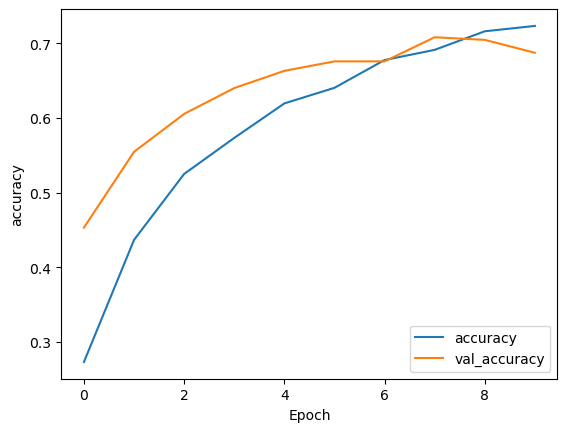

In [13]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

In [14]:
def show_loss_curve(training_result):
    
    loss_perf = training_result.history['loss']
    vall_loss = training_result.history['val_loss']
    
    plt.plot(loss_perf, label = 'loss')
    plt.plot(vall_loss, label= 'vall_loss')
    
             
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='lower right')

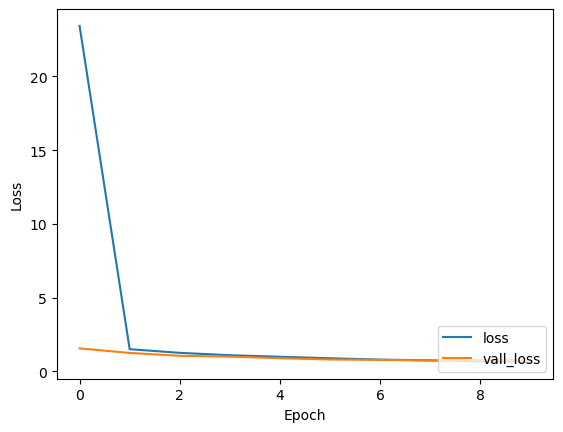

In [15]:
show_loss_curve(training_history)